***Importing libraries***

In [58]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [59]:
tf.__version__

'2.13.0'

***Data Preprocessing***

preprocessing the training set

In [60]:
##( image augmentation which consists basically of transforming your images
#of the training set so that your CNN model doesn't overlearn, you know is not over trained, on the existing images.)

In [61]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('cnn/Convolutional Neural Networks (CNN)/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


Preprocessing the Test set

In [62]:
test_datagen=ImageDataGenerator(rescale = 1./255)
test_set=test_datagen.flow_from_directory(
          'cnn/Convolutional Neural Networks (CNN)/dataset/test_set',
          target_size=(64,64),
          batch_size=32,
          class_mode='binary')

Found 2000 images belonging to 2 classes.


**Building the CNN**

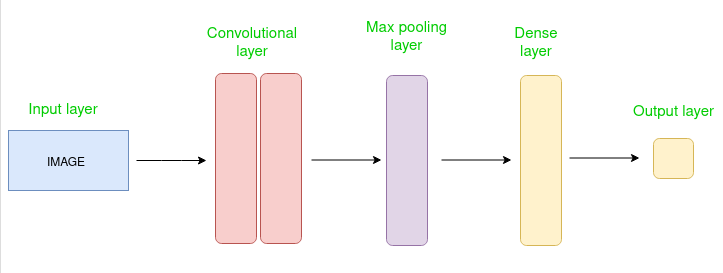

Initialising the CNN

In [63]:
cnn = tf.keras.models.Sequential()

**Step-1(Convolution layer)**

This is the layer, which is used to extract the feature from the input dataset. It applies a set of learnable filters known as the kernels to the input images. The filters/kernels are smaller matrices usually 2×2, 3×3, or 5×5 shape. it slides over the input image data and computes the dot product between kernel weight and the corresponding input image patch. The output of this layer is referred ad feature maps. Suppose we use a total of 12 filters for this layer we’ll get an output volume of dimension 32 x 32 x 12.

Activation Layer: By adding an activation function to the output of the preceding layer, activation layers add nonlinearity to the network. it will apply an element-wise activation function to the output of the convolution layer. Some common activation functions are RELU: max(0, x),  Tanh, Leaky RELU, etc. The volume remains unchanged hence output volume will have dimensions 32 x 32 x 12.

In [64]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=[64,64,3]))

**Step-2(Pooling)**

This layer is periodically inserted in the covnets and its main function is to reduce the size of volume which makes the computation fast reduces memory and also prevents overfitting. Two common types of pooling layers are max pooling and average pooling. If we use a max pool with 2 x 2 filters and stride 2, the resultant volume will be of dimension 16x16x12. 

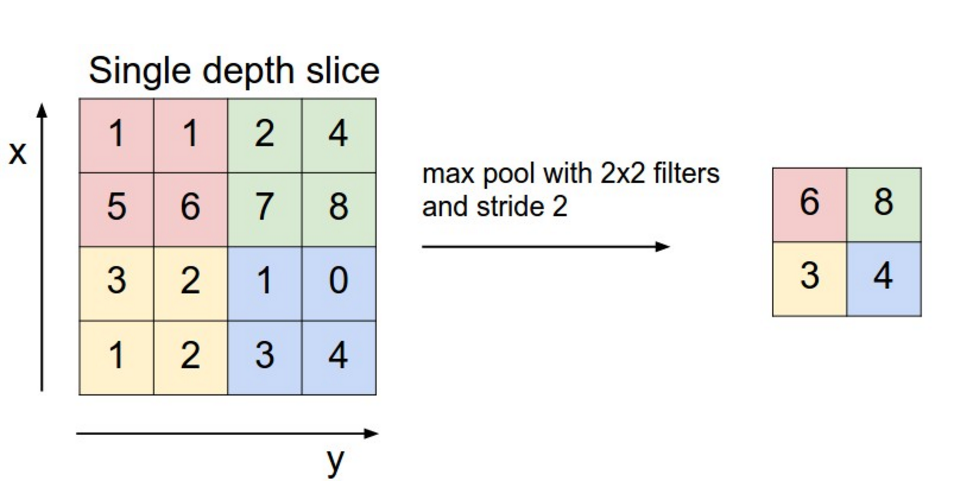

In [65]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Adding second convolutional layer

In [66]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

**Step-3(Flattening)**

The resulting feature maps are flattened into a one-dimensional vector after the convolution and pooling layers so they can be passed into a completely linked layer for categorization or regression.

In [67]:
cnn.add(tf.keras.layers.Flatten())

**Step-4(Full Connection)**

It takes the input from the previous layer and computes the final classification or regression task.

In [68]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

**Step-5(Output layer)**

In [69]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

**Training the CNN**

Compiling CNN

In [70]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Training the CNN on the Training set and evaluating it on the Test Set**

In [71]:
cnn.fit(x=training_set,validation_data=test_set,epochs=25)

Epoch 1/25
250/250 [==============================] - 55s 218ms/step - loss: 0.6592 - accuracy: 0.5921 - val_loss: 0.6121 - val_accuracy: 0.6700
Epoch 2/25
250/250 [==============================] - 52s 207ms/step - loss: 0.6001 - accuracy: 0.6758 - val_loss: 0.5648 - val_accuracy: 0.7145
Epoch 3/25
250/250 [==============================] - 51s 204ms/step - loss: 0.5491 - accuracy: 0.7215 - val_loss: 0.5109 - val_accuracy: 0.7535
Epoch 4/25
250/250 [==============================] - 51s 205ms/step - loss: 0.5172 - accuracy: 0.7400 - val_loss: 0.5141 - val_accuracy: 0.7495
Epoch 5/25
250/250 [==============================] - 52s 207ms/step - loss: 0.4965 - accuracy: 0.7566 - val_loss: 0.5223 - val_accuracy: 0.7450
Epoch 6/25
250/250 [==============================] - 52s 206ms/step - loss: 0.4780 - accuracy: 0.7632 - val_loss: 0.4762 - val_accuracy: 0.7835
Epoch 7/25
250/250 [==============================] - 51s 204ms/step - loss: 0.4630 - accuracy: 0.7761 - val_loss: 0.4614 - val_ac

**Part 4-Making a single prediction**

In [72]:
#from keras.engine.sequential import training
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('cnn/Convolutional Neural Networks (CNN)/dataset/single_prediction/karsten-winegeart-tUCvnMOvXFQ-unsplash.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0]>0.5:
    prediction='dog'
else:
  prediction ='cat'



1/1 [==============================] - 0s 70ms/step


In [73]:
print(prediction)

cat
